In [53]:
import os
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', 500)

#### Global variables

In [54]:
root = os.path.abspath(os.path.join(os.curdir, '../..'))

#### Read data

In [55]:
df = pd.read_csv("{}/data/input/df.csv".format(root))

In [56]:
des1 = df.describe()
des2 = df.isnull().sum().to_frame(name = "missing").T
des3 = pd.DataFrame(df.dtypes, columns=["type"]).T
desc = pd.concat([des1, des2, des3])
desc

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year,Rating,SG,PG,C,SF,%GS,%MPPG,FGPM,3PPM,2PPM,FTPM,ORBPM,DRBPM,ASTPM,STLPM,BLKPM,TOVPM,PTSPM,Player,Pos,Tm
count,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3209,3209,3209,3209,3209,3210,3209,3209,3209,3209,3209,NaN,NaN,NaN
mean,249.373,25.9751,56.6109,28.8903,1349.24,219.86,479.975,0.449887,52.2704,145.665,0.283434,167.59,334.311,0.490432,0.502301,98.8956,129.573,0.72658,58.9427,186.724,245.667,128.121,43.1776,27.6196,77.0174,0.215576,590.887,13.8149,0.535118,0.305671,0.265323,5.1328,15.3314,10.2353,13.376,1.57078,1.73648,12.9647,19.0105,1.551,1.38439,2.9348,0.0875408,-0.844579,-0.064891,-0.910062,0.739346,2017.66,75.038,0.228972,0.186293,0.202492,0.182555,0.442009,21.6853,0.151737,0.0359639,0.115773,0.0655437,0.0463437,inf,0.0861858,0.0315414,0.0210891,0.0554024,0.404981,NaN,NaN,NaN
std,144.464,4.11702,22.4583,29.1565,811.403,168.16,358.671,0.0846147,56.6881,148.339,0.151313,141.57,275.907,0.0918703,0.0805238,101.062,126.435,0.163594,60.217,144.342,196.066,133.109,33.253,31.6181,61.6228,0.411286,462.716,5.24754,0.0769544,0.213798,0.147588,4.28614,6.88402,5.02262,9.20767,0.825433,1.65075,4.95604,5.31532,2.04936,1.12362,2.88075,0.0737832,2.88593,1.47178,3.46621,1.36411,2.342,6.35139,0.420237,0.389403,0.40192,0.386361,0.407945,8.86358,0.0496885,0.0287938,0.0533096,0.0400748,0.0387348,NaN,0.0571353,0.0166146,0.0199962,0.0239552,0.132404,NaN,NaN,NaN
min,1,19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-28.5,0,0,0,0,0,0,0,0,0,0,0,-3.3,-0.5,-2.1,-0.899,-21.7,-22.1,-33.1,-2,2014,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
25%,126,23,43,2,659,81,185,0.409,3,14,0.238,55,114,0.451,0.47,28,40,0.669,18,77,100,36,17,7,30,0,215,10.7,0.505,0.111,0.169,2,10.4,6.3,7.1,1.1,0.6,10.1,15.3,0.1,0.5,0.7,0.052,-2.4,-0.9,-2.6,-0.1,2016,71,0,0,0,0,0.0434783,14.8938,0.118045,0.00790514,0.0772304,0.0382337,0.0185778,0.0934089,0.046595,0.0221729,0.00754717,0.039823,0.315789,NaN,NaN,NaN
50%,248,25,63,17,1363,191,420,0.444,34,104,0.333,134.5,272,0.49,0.505,68.5,93,0.761,39,163,209,85,38,17,64,0,503,13.5,0.54,0.3165,0.2405,3.6,14.2,9.1,10.4,1.5,1.2,12.5,18.4,1,1.2,2.3,0.089,-0.8,-0.1,-0.9,0.3,2018,74,0,0,0,0,0.300685,21.8062,0.147833,0.034965,0.110294,0.0584946,0.0326216,0.127713,0.0680813,0.0296108,0.0145926,0.0521845,0.393617,NaN,NaN,NaN
75%,372,29,75,58,2019.5,323,709,0.488,84.75,236.75,0.373,243,482,0.537,0.542,136,184.75,0.824,78,258,335,176,62,36,108,0,863.75,16.7,0.575,0.458,0.333,7.7,19.3,13.2,17.7,1.9,2.3,15.2,22.3,2.4,2,4.3,0.126,0.7,0.7,0.8,1.1,2020,78,0,0,0,0,0.962025,29.2083,0.18035,0.0560748,0.148712,0.0860215,0.0686869,0.173588,0.113915,0.0385093,0.028169,0.0680834,0.47919,NaN,NaN,NaN
max,540,41,83,82,3167,857,1941,1,402,1028,1,730,1421,1,1,754,881,1,440,848,1247,907,191,269,464,1,2818,40.8,1,1,1.5,80.9,100,56.4,100,16.2,15.1,75,43.9,14.8,6.6,19.3,0.492,12.4,17.8,17.2,9.9,2021,99,1,1,1,1,1,38.7273,0.5,0.166667,0.5,0.5,0.75,inf,0.5,0.333333,0.192982,0.333333,1,NaN,NaN,NaN
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0
type,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,float64,int64,int64,float64,float64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object


## EDA

#### Functions

In [57]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    """
    Function to display values on barchart
    """
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + 4
                _y = p.get_y() + p.get_height() - 0.3
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

### Number of players

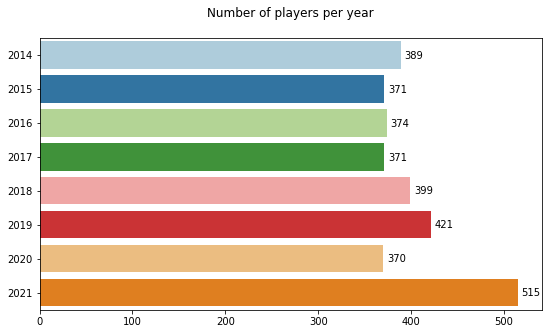

In [58]:
plt.figure(figsize=(9,5))
plt.title('Number of players per year\n')

ax = sns.barplot(
    x = 'Player', 
    y = 'Year', 
    data = df.groupby("Year")["Player"].nunique().reset_index(), 
    palette = sns.color_palette("Paired", 8),
    orient = 'h'
)

ax.set_xlabel('')
ax.set_ylabel('')
show_values_on_bars(ax, "h")

### Rating over years

We observe that the average rating in 2014 was lower that for other years and the distribution of 2013 is unique and would decrease model performance.

In [59]:
df.groupby("Year")["Rating"].mean()

Year
2014    71.390746
2015    74.908356
2016    74.545455
2017    75.679245
2018    75.714286
2019    75.940618
2020    76.867568
2021    75.205825
Name: Rating, dtype: float64

Text(0, 0.5, '')

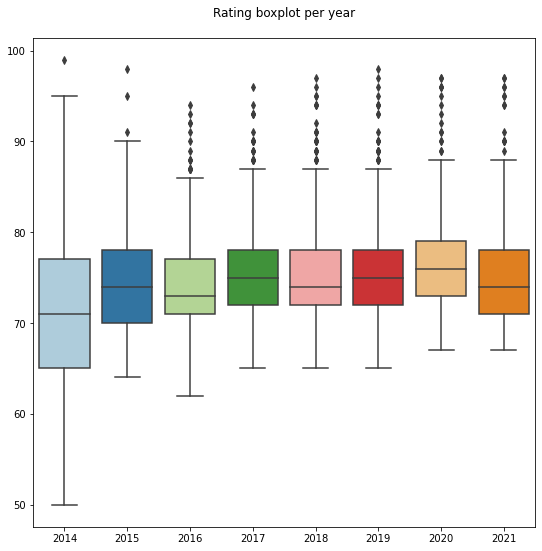

In [47]:
plt.figure(figsize = (9,9))
plt.title('Rating boxplot per year\n')

ax = sns.boxplot(
    data = df, 
    x = 'Year', 
    y = 'Rating',
    palette = sns.color_palette("Paired", 8)
)

ax.set_xlabel('')
ax.set_ylabel('')

### Regression between BPM and Rating

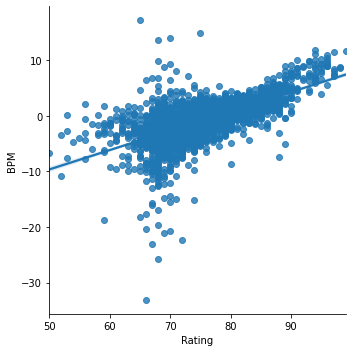

In [49]:
df["BPM"] = df["BPM"].astype(float)
sns.lmplot(
    data = df, 
    x = "Rating", 
    y = "BPM"
)
plt.show()

### Correlation

<AxesSubplot:>

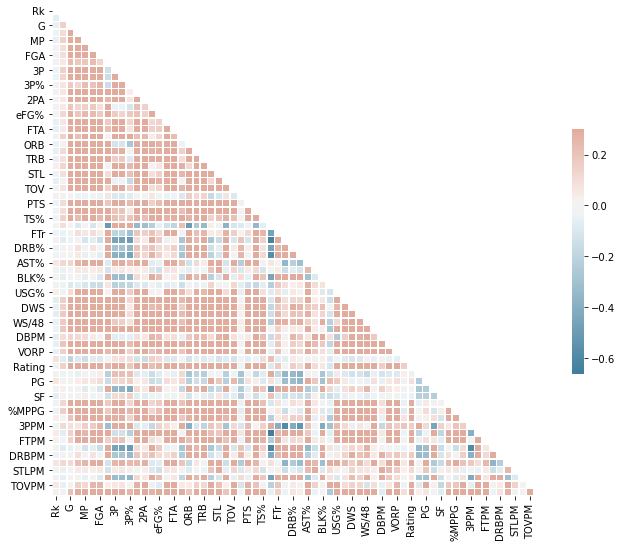

In [51]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlibwxcv figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})